In [57]:
import pandas as pd
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

df=pd.read_csv('Mrec.csv')
X=df.drop(columns=['Genre'])
y=df['Genre']


In [ ]:
#Model testing
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

#predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
#predictions


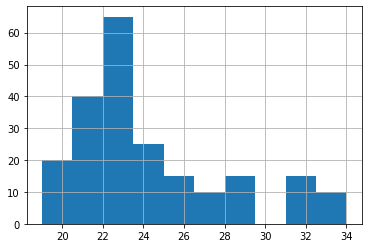

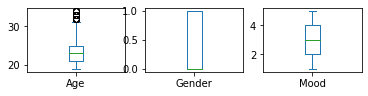

In [58]:
#Data visualization
age=df['Age']
age.hist()
#df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
X.plot(kind='box', subplots=True, layout=(3,3), sharex=False)
#scatter_matrix(df)

pyplot.show()


In [59]:
#Checking for null values to fill
null_sum=df.isnull().sum()
null_sum
data_shape=df.shape
data_shape
#df.dropna()
#df.describe

(215, 4)

In [63]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#print(df['Age'].quantile(0.5))
print((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))
#df['Age'].describe()

       Age  Gender  Genre   Mood
0    False   False  False  False
1    False   False  False  False
2    False   False  False  False
3    False   False  False  False
4    False   False  False  False
..     ...     ...    ...    ...
210   True   False  False  False
211   True   False  False  False
212   True   False  False  False
213   True   False  False  False
214   True   False  False  False

[215 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_8068\3337425943.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))
